In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from src import GetUserClimbData as gud
from src import AssesItemBased as assess
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
uid_path = './user_ids/uids.csv'
user_data = gud.get_users_climbs(uid_path)
user_data_idx = user_data.set_index('user_id')
# route_data = star_data.T  
# route_data = route_data.drop(labels='user_id', axis=0)
# cs_sim = cosine_similarity(route_data)

In [3]:
route_data = user_data.T  
route_data = route_data.drop(labels='user_id', axis=0)
cs_sim = cosine_similarity(route_data)


In [4]:
assess.test_folds(user_data_idx,cs_sim,5,'')

In [7]:
metrics = assess.run_eval('',5)

MAP on 5 folds 0.6145 +/- 0.0591
NDCG10 on 5 folds 0.9969 +/- 0.0023


In [26]:
from src import RequestMPData as rmp
from src import RecPopular as rp


In [21]:
  metrics = assess.run_eval('popular_',5)

MAP on 5 folds 0.006 +/- 0.0053
NDCG10 on 5 folds 0.1408 +/- 0.0486


In [45]:
import pandas as pd
pd.DataFrame([metrics[1]],columns=metrics[0])

,Mean MAP,Std MAP,Mean NDCG10,Std NDCG10
0,0.006,0.0053,0.1408,0.0486


In [48]:
mf = rp.paralell_pop(user_data_idx,[10,50,100],[0.5,1,2])
mf

,Mean MAP,Std MAP,Mean NDCG10,Std NDCG10,starWeight,voteWeight
0,0.00888,0.00881,0.13238,0.07430,10,0.5
0,0.00700,0.00500,0.13309,0.10394,10,1.0
0,0.00650,0.00473,0.17601,0.08987,10,2.0
0,0.00467,0.00239,0.13963,0.05867,50,0.5
0,0.00399,0.00171,0.15351,0.08641,50,1.0
0,0.00513,0.00659,0.12775,0.04932,50,2.0
0,0.00588,0.00474,0.13152,0.08002,100,0.5
0,0.00435,0.00289,0.16357,0.07748,100,1.0
0,0.00346,0.00147,0.14389,0.11204,100,2.0


In [49]:
mf.to_csv('analyze/pop_rec_scores_2.csv',index=False)

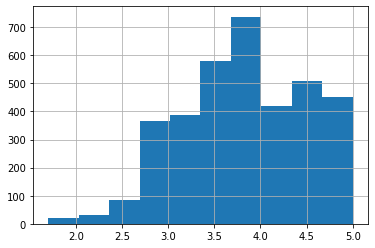

In [50]:
rf = pd.read_csv('./data/route_data.csv')
rf['stars'].hist()


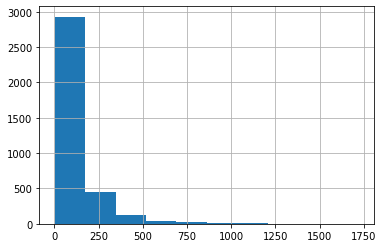

In [51]:
rf['starVotes'].hist()